# MCC125 - Wireless Link Project - LSTM

## 1. Loading the data

In [3]:
import torch
import torch.nn as nn
from tqdm import tqdm
import numpy as np
import os
import model_LSTM
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import torch
import torch.nn as nn
from torch.utils.data import Dataset
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model_Transformer_modified
import ast  # Used to parse complex numbers from string

## 2. Pre-processing

In [4]:
output_file_feature = 'simulation_feature_dataset_processing.csv'
output_file_target = 'simulation_target_dataset_processing.csv'

# Define a function to parse complex numbers from string
def complex_parser(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return s

In [5]:
df_target = pd.read_csv(output_file_target, header=None, converters={col: complex_parser for col in range(len(pd.read_csv(output_file_target).columns))})

df_feature = pd.read_csv(output_file_feature, header=None, converters={col: complex_parser for col in range(len(pd.read_csv(output_file_feature).columns))})

# filter zero values rows in the dataframe
df_target = df_target[df_target.loc[:,0] != 0j]
df_feature = df_feature[df_feature.loc[:,0] != 0j]

In [6]:
df_target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.574380+0.114876j,0.574380+0.038292j,0.191460+0.038292j,-0.421212+0.497796j,1.110467-0.344628j,-0.344628-1.110467j,-0.804132-0.727548j,-0.804132-0.038292j,0.344628-0.038292j,0.344628-0.114876j,-0.038292+0.497796j,0.574380+0.957299j,-1.187051+0.727548j,0.114876-0.344628j,-0.038292+0.957299j
1,-0.880716+0.114876j,0.880716+1.187051j,-0.650964+0.421212j,-0.268044+0.191460j,0.344628-0.268044j,-0.114876+0.650964j,-1.110467-0.344628j,1.033883+0.421212j,-0.497796-0.957299j,0.650964+0.880716j,-0.114876-0.114876j,0.574380-0.268044j,0.650964+0.880716j,-0.727548+0.268044j,0.957299+0.497796j
2,0.421212-0.114876j,-0.114876-0.880716j,-1.033883+0.957299j,0.804132+0.497796j,-0.114876+1.033883j,0.957299+0.191460j,0.191460-1.110467j,0.191460-0.957299j,0.344628+0.727548j,0.574380-0.650964j,0.497796+0.574380j,-0.650964+0.421212j,-1.033883+0.574380j,-0.268044+0.114876j,-0.191460-1.110467j
3,0.574380+0.650964j,0.574380-0.804132j,-0.804132-0.344628j,-0.957299-0.957299j,0.421212+0.804132j,-0.114876+0.650964j,0.038292+0.268044j,0.114876+0.268044j,0.497796-0.574380j,-0.727548+1.110467j,-0.650964+0.268044j,-0.421212+0.344628j,-1.110467+0.804132j,-0.114876+1.187051j,-0.880716+1.187051j
4,-0.880716-0.344628j,1.033883+0.804132j,-0.650964-0.421212j,0.268044-0.727548j,-1.110467+0.114876j,-1.187051-1.110467j,0.574380+0.421212j,0.497796+0.421212j,0.880716+0.957299j,-0.574380-0.344628j,-0.038292-0.038292j,-1.033883+0.114876j,-0.421212+1.187051j,-0.191460-0.114876j,-0.344628+0.191460j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.574380+0.268044j,0.650964-0.268044j,-1.110467-0.804132j,0.574380-0.574380j,-0.114876+0.268044j,0.804132+0.268044j,-0.804132+0.957299j,1.110467+1.110467j,-0.727548-0.804132j,-1.033883+0.191460j,-0.497796+0.344628j,-0.344628-0.421212j,-0.268044+0.114876j,-0.344628+0.574380j,0.880716+0.114876j
29996,-0.727548+0.421212j,0.344628+0.114876j,-0.421212+0.574380j,-0.650964-0.650964j,1.033883+0.268044j,1.110467-0.268044j,-1.033883-0.344628j,0.114876-0.650964j,0.038292+0.804132j,0.574380-0.191460j,0.650964-0.804132j,1.187051+0.114876j,0.727548-0.804132j,1.033883+0.344628j,0.114876+0.727548j
29997,-1.033883-0.497796j,0.421212-0.191460j,0.727548+0.574380j,-0.114876-0.114876j,0.038292+0.268044j,-1.187051+0.497796j,-0.344628-0.650964j,0.727548-0.114876j,-0.344628+0.804132j,-0.038292-0.344628j,-1.033883-0.421212j,0.114876-0.191460j,-0.038292-1.033883j,0.497796-0.191460j,-0.268044+0.344628j
29998,-1.033883+0.114876j,0.957299-0.804132j,-0.191460-0.574380j,0.804132-1.110467j,0.344628+0.038292j,-0.497796+0.421212j,-0.344628-0.727548j,-0.268044-0.038292j,-1.110467+0.727548j,0.421212+0.344628j,0.114876-0.957299j,1.187051-0.650964j,-1.033883+0.191460j,-1.110467+0.957299j,-0.957299-0.574380j


In [7]:
df_feature

,0,1,2,3,4,5,6,7,8,9,...,465,466,467,468,469,470,471,472,473,474
0,-1.245799-0.292176j,-1.330345-0.318523j,-1.333179-0.327656j,-1.295741-0.327539j,-1.257863-0.325232j,-1.242229-0.324840j,-1.249740-0.327369j,-1.265334-0.330762j,-1.270650-0.331395j,-1.258896-0.326735j,...,0.223757-0.379588j,0.244452-0.201714j,0.092920+0.175302j,-0.114768+0.635493j,-0.277130+1.017293j,-0.343242+1.189098j,-0.315785+1.108918j,-0.231035+0.835668j,-0.132680+0.489787j,-0.052745+0.190412j
1,1.106911+0.491718j,1.177100+0.521656j,1.172034+0.520385j,1.131914+0.507528j,1.095133+0.499688j,1.082941+0.503957j,1.095336+0.517099j,1.116791+0.529557j,1.128315+0.531811j,1.121248+0.520812j,...,0.951374+0.052800j,0.759483-0.036866j,0.339731-0.312025j,-0.170124-0.652597j,-0.597819-0.921273j,-0.816160-1.019368j,-0.794928-0.922378j,-0.599373-0.680918j,-0.342885-0.389879j,-0.126636-0.142680j
2,0.018773+1.244856j,0.021368+1.319193j,0.024165+1.313594j,0.023490+1.275121j,0.018128+1.244869j,0.010646+1.241904j,0.005653+1.261579j,0.006373+1.284680j,0.012243+1.291802j,0.018959+1.277444j,...,0.140435+0.337597j,-0.133219+0.260295j,-0.506815+0.242203j,-0.917298+0.242280j,-1.249729+0.230142j,-1.389536+0.196261j,-1.283955+0.146636j,-0.973925+0.091823j,-0.575025+0.040488j,-0.219282-0.000987j
3,1.295474-0.280640j,1.375535-0.299172j,1.371563-0.299915j,1.331481-0.291760j,1.298031-0.283309j,1.291666-0.280071j,1.308322-0.283263j,1.329003-0.290310j,1.335002-0.297024j,1.322205-0.300643j,...,-0.129886-1.593995j,-0.059573-1.652626j,0.190969-1.739536j,0.509871-1.828353j,0.767413-1.860173j,0.870409-1.767205j,0.795386-1.512713j,0.587682-1.121238j,0.331428-0.676545j,0.108752-0.284741j
4,-0.802838-0.766358j,-0.852347-0.813439j,-0.847930-0.812228j,-0.820891-0.790825j,-0.799941-0.773245j,-0.799005-0.770460j,-0.814688-0.779914j,-0.832167-0.790823j,-0.836501-0.792250j,-0.823647-0.781384j,...,-0.087930-0.242369j,-0.068578-0.280977j,-0.157946-0.247598j,-0.289956-0.190257j,-0.395097-0.141364j,-0.429473-0.108417j,-0.386520-0.082776j,-0.290129-0.055175j,-0.177237-0.025308j,-0.080350-0.000589j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.591411-0.946587j,-0.631333-1.003882j,-0.632693-0.998537j,-0.615195-0.966185j,-0.596590-0.939667j,-0.586312-0.935106j,-0.584751-0.948876j,-0.586570-0.964652j,-0.585496-0.966410j,-0.579427-0.950975j,...,-0.745403-0.004432j,-0.603040+0.153681j,-0.333364+0.382821j,-0.013515+0.632996j,0.257330+0.827564j,0.404964+0.897226j,0.411455+0.815245j,0.314687+0.612213j,0.180684+0.361055j,0.067738+0.140979j
29996,1.414226-0.558196j,1.500999-0.596972j,1.492131-0.602040j,1.437303-0.592868j,1.383923-0.585465j,1.359225-0.585929j,1.364790-0.590859j,1.383077-0.592651j,1.391935-0.585949j,1.381941-0.572388j,...,-1.675473+0.076402j,-1.568001-0.163546j,-1.316565-0.408754j,-1.014707-0.661175j,-0.744910-0.870518j,-0.544256-0.962972j,-0.402459-0.892619j,-0.287181-0.677981j,-0.175038-0.397339j,-0.067040-0.147374j
29997,0.722211-1.194098j,0.766435-1.271573j,0.760854-1.273961j,0.735113-1.245743j,0.714173-1.224247j,0.708246-1.225443j,0.713131-1.243518j,0.717808-1.260203j,0.714080-1.258104j,0.703292-1.233477j,...,-0.105733+0.736649j,-0.217215+0.551022j,-0.246886+0.251756j,-0.244449-0.097723j,-0.239509-0.398960j,-0.232995-0.565116j,-0.210805-0.563894j,-0.164268-0.430281j,-0.101104-0.242452j,-0.040537-0.078296j
29998,0.749197+1.069434j,0.793965+1.148567j,0.792032+1.157250j,0.771860+1.130366j,0.757186+1.101022j,0.757277+1.087773j,0.766513+1.091279j,0.771764+1.099125j,0.762402+1.096343j,0.738889+1.077893j,...,1.846746+0.453473j,1.664992+0.588680j,1.291616+0.852089j,0.824895+1.155062j,0.401593+1.383355j,0.122026+1.440803j,0.004537+1.290577j,-0.004731+0.972788j,0.017895+0.586556j,0.022631+0.244009j


In [8]:
target_symbol = df_target.to_numpy()

real_target_symbol = np.real(target_symbol)
imag_target_symbol = np.imag(target_symbol)

y = np.array([real_target_symbol, imag_target_symbol]).transpose(1, 2, 0)


feature_symbol = df_feature.to_numpy()
real_feature_symbol = np.real(feature_symbol)
imag_feature_symbol = np.imag(feature_symbol)

X = np.array([real_feature_symbol, imag_feature_symbol]).transpose(1, 2, 0)

In [9]:
print(X.shape)
print(y.shape)
print(X.shape[0])

(30000, 475, 2)
(30000, 15, 2)
30000


In [10]:
class SymbolDataset(Dataset):
    """Class to create the torch Dataset object
    """
    def __init__(self, X, y):
        super(SymbolDataset, self).__init__()

        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        """Total number of samples"""
        return len(self.X[:,0,0])

In [11]:
# defining batch size
batch_size = 32

# creating torch dataset and dataloaders
symbol_dataset = SymbolDataset(X,y)
train_loader = DataLoader(symbol_dataset, batch_size, shuffle=True, num_workers=0)

In [12]:
# defining model save location
save_location = "./LSTM_models"

## 3. Data loaders

## 4. Training

#### 4.1 create a model

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

LSTM_model = model_LSTM.LSTM(input_size=2, input_seq_len=475,
                             hidden_size=128, num_layers=3, output_size=2, output_seq_len=15).to(device)

In [14]:
LSTM_model

LSTM(
  (LSTM_first_layer): ModuleList(
    (0): LSTMCell(
      (W_hh): Linear(in_features=128, out_features=512, bias=True)
      (W_xh): Linear(in_features=2, out_features=512, bias=True)
    )
    (1-2): 2 x LSTMCell(
      (W_hh): Linear(in_features=128, out_features=512, bias=True)
      (W_xh): Linear(in_features=128, out_features=512, bias=True)
    )
  )
  (LSTM_whole): ModuleList(
    (0): LSTMCell(
      (W_hh): Linear(in_features=128, out_features=512, bias=True)
      (W_xh): Linear(in_features=2, out_features=512, bias=True)
    )
    (1-2): 2 x LSTMCell(
      (W_hh): Linear(in_features=128, out_features=512, bias=True)
      (W_xh): Linear(in_features=128, out_features=512, bias=True)
    )
  )
  (fc): Linear(in_features=60800, out_features=30, bias=True)
)

#### 4.2 The training loop

In [16]:
# number of epochs
epochs = 100

# metric variables
training_loss = []
validation_loss = []
val_mad = []
val_fad = []

# Define the MSE loss function
criterion = nn.MSELoss().float()

learning_rate = 0.0001
# optimizer = torch.optim.SGD(LSTM_model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=learning_rate)
# optimizer = torch.optim.AdamW(LSTM_model.parameters(), lr=1e-2, betas=(0.9, 0.95), weight_decay=1e-1)


for epoch in tqdm(range(epochs)):
    # TRAINING MODE
    LSTM_model.train()

    # training batch variables
    train_batch_loss = 0

    for idx, (x, y) in enumerate(train_loader):
        # getting encoder input data
        feature = x.float().to(device)
        target = y.float().to(device)

        # forward pass
        optimizer.zero_grad()
        # predictions = tf_model.forward(enc_input, dec_input, dec_source_mask, dec_target_mask)
        predictions = LSTM_model.forward(feature)

        loss = criterion(predictions.view(feature.size(0), -1),
                         target.contiguous().view(feature.size(0), -1))
        train_batch_loss += loss.item()

        # updating weights
        loss.backward()
        optimizer.step()

    training_loss.append(train_batch_loss/len(train_loader))
    print("Epoch {}/{}....Training loss = {:.4f}".format(epoch +
                                                         1, epochs, training_loss[-1]))

    if (epoch)%10 == 0:
        # Saving model, loss and error log files
        torch.save({
            'model_state_dict': LSTM_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'training_loss': training_loss,
        }, os.path.join(save_location, 'Channel_model_LSTM_epoch{}.pth'.format(epoch+1)))


  1%|          | 1/100 [14:04<23:13:26, 844.51s/it]

Epoch 1/100....Training loss = 0.4990


  2%|▏         | 2/100 [28:06<22:56:36, 842.82s/it]

Epoch 2/100....Training loss = 0.4988


  3%|▎         | 3/100 [42:10<22:43:22, 843.33s/it]

Epoch 3/100....Training loss = 0.4080


  4%|▍         | 4/100 [56:19<22:33:05, 845.68s/it]

Epoch 4/100....Training loss = 0.0113


  5%|▌         | 5/100 [1:10:28<22:20:46, 846.81s/it]

Epoch 5/100....Training loss = 0.0066


  6%|▌         | 6/100 [1:24:36<22:07:15, 847.19s/it]

Epoch 6/100....Training loss = 0.0063


  7%|▋         | 7/100 [1:38:45<21:54:02, 847.76s/it]

Epoch 7/100....Training loss = 0.0062


  8%|▊         | 8/100 [1:52:52<21:39:52, 847.74s/it]

Epoch 8/100....Training loss = 0.0060


  9%|▉         | 9/100 [2:07:02<21:26:43, 848.38s/it]

Epoch 9/100....Training loss = 0.0062


 10%|█         | 10/100 [2:21:11<21:12:45, 848.51s/it]

Epoch 10/100....Training loss = 0.0060


 11%|█         | 11/100 [2:35:19<20:58:15, 848.27s/it]

Epoch 11/100....Training loss = 0.0058


 12%|█▏        | 12/100 [2:49:17<20:39:52, 845.37s/it]

Epoch 12/100....Training loss = 0.0060


 13%|█▎        | 13/100 [3:02:19<19:57:46, 826.06s/it]

Epoch 13/100....Training loss = 0.0057


 14%|█▍        | 14/100 [3:15:10<19:20:19, 809.52s/it]

Epoch 14/100....Training loss = 0.0047


 15%|█▌        | 15/100 [3:28:04<18:51:25, 798.65s/it]

Epoch 15/100....Training loss = 0.0030


 16%|█▌        | 16/100 [3:41:00<18:28:31, 791.80s/it]

Epoch 16/100....Training loss = 0.0026


 17%|█▋        | 17/100 [3:53:56<18:08:57, 787.20s/it]

Epoch 17/100....Training loss = 0.0024


 18%|█▊        | 18/100 [4:06:51<17:50:59, 783.65s/it]

Epoch 18/100....Training loss = 0.0023


 19%|█▉        | 19/100 [4:19:48<17:35:01, 781.50s/it]

Epoch 19/100....Training loss = 0.0021


 20%|██        | 20/100 [4:32:45<17:20:06, 780.08s/it]

Epoch 20/100....Training loss = 0.0024


 21%|██        | 21/100 [4:45:42<17:05:59, 779.23s/it]

Epoch 21/100....Training loss = 0.0019


 22%|██▏       | 22/100 [4:58:37<16:51:25, 778.02s/it]

Epoch 22/100....Training loss = 0.0020


 23%|██▎       | 23/100 [5:11:35<16:38:29, 778.04s/it]

Epoch 23/100....Training loss = 0.0019


 24%|██▍       | 24/100 [5:24:32<16:24:55, 777.58s/it]

Epoch 24/100....Training loss = 0.0021


 25%|██▌       | 25/100 [5:37:28<16:11:34, 777.26s/it]

Epoch 25/100....Training loss = 0.0020


 26%|██▌       | 26/100 [5:50:27<15:59:03, 777.62s/it]

Epoch 26/100....Training loss = 0.0020


 27%|██▋       | 27/100 [6:03:25<15:46:22, 777.84s/it]

Epoch 27/100....Training loss = 0.0019


 28%|██▊       | 28/100 [6:16:22<15:32:57, 777.46s/it]

Epoch 28/100....Training loss = 0.0019


 29%|██▉       | 29/100 [6:29:15<15:18:29, 776.20s/it]

Epoch 29/100....Training loss = 0.0018


 30%|███       | 30/100 [6:42:09<15:04:54, 775.64s/it]

Epoch 30/100....Training loss = 0.0019


 31%|███       | 31/100 [6:55:03<14:51:13, 774.98s/it]

Epoch 31/100....Training loss = 0.0017


 32%|███▏      | 32/100 [7:07:54<14:37:08, 773.94s/it]

Epoch 32/100....Training loss = 0.0019


 33%|███▎      | 33/100 [7:20:45<14:23:17, 773.10s/it]

Epoch 33/100....Training loss = 0.0018


 34%|███▍      | 34/100 [7:33:38<14:10:19, 773.03s/it]

Epoch 34/100....Training loss = 0.0017


 35%|███▌      | 35/100 [7:46:31<13:57:26, 773.03s/it]

Epoch 35/100....Training loss = 0.0018


 36%|███▌      | 36/100 [7:59:24<13:44:26, 772.92s/it]

Epoch 36/100....Training loss = 0.0017


 37%|███▋      | 37/100 [8:12:21<13:32:53, 774.18s/it]

Epoch 37/100....Training loss = 0.0017


 38%|███▊      | 38/100 [8:25:18<13:20:46, 774.94s/it]

Epoch 38/100....Training loss = 0.0017


 39%|███▉      | 39/100 [8:38:15<13:08:41, 775.76s/it]

Epoch 39/100....Training loss = 0.0017


 40%|████      | 40/100 [8:51:10<12:55:31, 775.52s/it]

Epoch 40/100....Training loss = 0.0016


 41%|████      | 41/100 [9:04:07<12:42:53, 775.81s/it]

Epoch 41/100....Training loss = 0.0018


 42%|████▏     | 42/100 [9:17:03<12:29:54, 775.77s/it]

Epoch 42/100....Training loss = 0.0015


 43%|████▎     | 43/100 [9:29:54<12:15:43, 774.45s/it]

Epoch 43/100....Training loss = 0.0016


 44%|████▍     | 44/100 [9:42:45<12:01:47, 773.34s/it]

Epoch 44/100....Training loss = 0.0017


 45%|████▌     | 45/100 [9:56:36<12:04:44, 790.62s/it]

Epoch 45/100....Training loss = 0.0016


 46%|████▌     | 46/100 [10:10:08<11:57:28, 797.19s/it]

Epoch 46/100....Training loss = 0.0017


 47%|████▋     | 47/100 [10:23:42<11:48:30, 802.08s/it]

Epoch 47/100....Training loss = 0.0015


 48%|████▊     | 48/100 [10:37:13<11:37:27, 804.76s/it]

Epoch 48/100....Training loss = 0.0015


 49%|████▉     | 49/100 [10:50:36<11:23:38, 804.28s/it]

Epoch 49/100....Training loss = 0.0017


 50%|█████     | 50/100 [11:04:13<11:13:30, 808.22s/it]

Epoch 50/100....Training loss = 0.0015


 51%|█████     | 51/100 [11:17:33<10:57:56, 805.64s/it]

Epoch 51/100....Training loss = 0.0016


 53%|█████▎    | 53/100 [11:43:28<10:19:44, 791.16s/it]

Epoch 53/100....Training loss = 0.0014


 54%|█████▍    | 54/100 [11:56:25<10:03:24, 787.05s/it]

Epoch 54/100....Training loss = 0.0016


 55%|█████▌    | 55/100 [12:09:30<9:49:49, 786.43s/it] 

Epoch 55/100....Training loss = 0.0015


 56%|█████▌    | 56/100 [12:22:35<9:36:21, 785.94s/it]

Epoch 56/100....Training loss = 0.0015


 57%|█████▋    | 57/100 [12:35:31<9:21:06, 782.94s/it]

Epoch 57/100....Training loss = 0.0014


 58%|█████▊    | 58/100 [12:48:31<9:07:24, 782.02s/it]

Epoch 58/100....Training loss = 0.0015


 59%|█████▉    | 59/100 [13:01:33<8:54:23, 782.04s/it]

Epoch 59/100....Training loss = 0.0015


 60%|██████    | 60/100 [13:14:39<8:42:06, 783.17s/it]

Epoch 60/100....Training loss = 0.0015


 61%|██████    | 61/100 [13:27:44<8:29:22, 783.64s/it]

Epoch 61/100....Training loss = 0.0015


 62%|██████▏   | 62/100 [13:40:47<8:16:20, 783.69s/it]

Epoch 62/100....Training loss = 0.0014


 63%|██████▎   | 63/100 [13:53:57<8:04:26, 785.58s/it]

Epoch 63/100....Training loss = 0.0014


 64%|██████▍   | 64/100 [14:07:08<7:52:19, 787.21s/it]

Epoch 64/100....Training loss = 0.0014


 65%|██████▌   | 65/100 [14:20:15<7:39:02, 786.92s/it]

Epoch 65/100....Training loss = 0.0015


 66%|██████▌   | 66/100 [14:33:20<7:25:35, 786.33s/it]

Epoch 66/100....Training loss = 0.0017


 67%|██████▋   | 67/100 [14:46:25<7:12:19, 786.04s/it]

Epoch 67/100....Training loss = 0.0015


 68%|██████▊   | 68/100 [14:59:30<6:59:00, 785.65s/it]

Epoch 68/100....Training loss = 0.0014


 69%|██████▉   | 69/100 [15:12:38<6:46:23, 786.56s/it]

Epoch 69/100....Training loss = 0.0014


 70%|███████   | 70/100 [15:26:03<6:35:59, 791.98s/it]

Epoch 70/100....Training loss = 0.0014


 71%|███████   | 71/100 [15:39:13<6:22:30, 791.38s/it]

Epoch 71/100....Training loss = 0.0013


 72%|███████▏  | 72/100 [15:52:17<6:08:17, 789.21s/it]

Epoch 72/100....Training loss = 0.0016


 73%|███████▎  | 73/100 [16:05:35<5:56:19, 791.85s/it]

Epoch 73/100....Training loss = 0.0013


 74%|███████▍  | 74/100 [16:18:38<5:42:01, 789.29s/it]

Epoch 74/100....Training loss = 0.0015


 75%|███████▌  | 75/100 [16:31:39<5:27:47, 786.72s/it]

Epoch 75/100....Training loss = 0.0015


 76%|███████▌  | 76/100 [16:44:39<5:13:50, 784.59s/it]

Epoch 76/100....Training loss = 0.0013


 77%|███████▋  | 77/100 [16:57:41<5:00:27, 783.79s/it]

Epoch 77/100....Training loss = 0.0015


 78%|███████▊  | 78/100 [17:10:45<4:47:29, 784.07s/it]

Epoch 78/100....Training loss = 0.0014


 79%|███████▉  | 79/100 [17:23:44<4:33:47, 782.26s/it]

Epoch 79/100....Training loss = 0.0014


 80%|████████  | 80/100 [17:36:47<4:20:53, 782.68s/it]

Epoch 80/100....Training loss = 0.0013


 81%|████████  | 81/100 [17:49:50<4:07:49, 782.59s/it]

Epoch 81/100....Training loss = 0.0014


 82%|████████▏ | 82/100 [18:02:51<3:54:41, 782.32s/it]

Epoch 82/100....Training loss = 0.0015


 83%|████████▎ | 83/100 [18:15:52<3:41:33, 781.97s/it]

Epoch 83/100....Training loss = 0.0013


 84%|████████▍ | 84/100 [18:28:58<3:28:48, 783.05s/it]

Epoch 84/100....Training loss = 0.0012


 85%|████████▌ | 85/100 [18:42:05<3:16:01, 784.13s/it]

Epoch 85/100....Training loss = 0.0013


 86%|████████▌ | 86/100 [18:55:22<3:03:53, 788.10s/it]

Epoch 86/100....Training loss = 0.0014


 87%|████████▋ | 87/100 [19:08:39<2:51:19, 790.69s/it]

Epoch 87/100....Training loss = 0.0013


 88%|████████▊ | 88/100 [19:21:52<2:38:16, 791.40s/it]

Epoch 88/100....Training loss = 0.0013


 89%|████████▉ | 89/100 [19:35:09<2:25:23, 793.03s/it]

Epoch 89/100....Training loss = 0.0014


 90%|█████████ | 90/100 [19:48:20<2:12:06, 792.61s/it]

Epoch 90/100....Training loss = 0.0012


 91%|█████████ | 91/100 [20:02:07<2:00:26, 802.90s/it]

Epoch 91/100....Training loss = 0.0014


 92%|█████████▏| 92/100 [20:16:56<1:50:28, 828.61s/it]

Epoch 92/100....Training loss = 0.0012


 93%|█████████▎| 93/100 [20:31:37<1:38:30, 844.42s/it]

Epoch 93/100....Training loss = 0.0012


 94%|█████████▍| 94/100 [20:46:19<1:25:34, 855.76s/it]

Epoch 94/100....Training loss = 0.0012


 95%|█████████▌| 95/100 [21:00:52<1:11:44, 860.83s/it]

Epoch 95/100....Training loss = 0.0012


 96%|█████████▌| 96/100 [21:15:07<57:16, 859.16s/it]  

Epoch 96/100....Training loss = 0.0012


 97%|█████████▋| 97/100 [21:29:00<42:33, 851.33s/it]

Epoch 97/100....Training loss = 0.0012


 98%|█████████▊| 98/100 [21:42:14<27:47, 833.90s/it]

Epoch 98/100....Training loss = 0.0012


 99%|█████████▉| 99/100 [21:54:44<13:28, 808.95s/it]

Epoch 99/100....Training loss = 0.0012


100%|██████████| 100/100 [22:07:17<00:00, 796.38s/it]

Epoch 100/100....Training loss = 0.0011


## 5. Visualisation

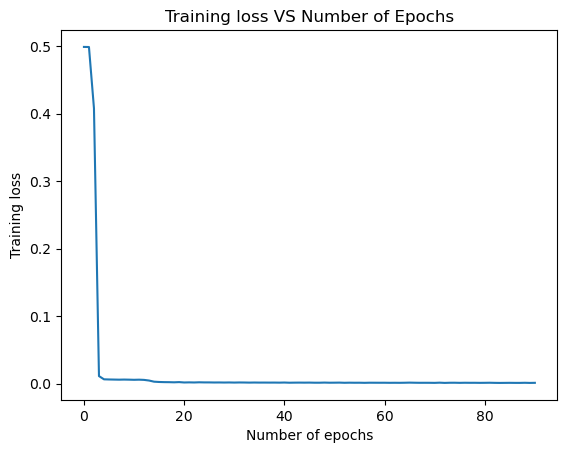

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
loaded_file = torch.load(os.path.join(
    save_location, 'Channel_model_LSTM_epoch91.pth'), map_location=torch.device(device))

# creating model and loading weights
# encoder_ip_size = 2
# decoder_ip_size = 3
# model_op_size = 3
# emb_size = 512
# num_heads = 8
# ff_hidden_size = 2048
# n = 6
# dropout = 0.1

# model_loaded = model.TFModel(encoder_ip_size, decoder_ip_size, model_op_size, emb_size,
#                              num_heads, ff_hidden_size, n, dropout=0.1)

model_loaded = model_LSTM.LSTM(input_size=2, input_seq_len=475,
                             hidden_size=128, num_layers=3, output_size=2, output_seq_len=15).to(device)


model_loaded = model_loaded.to(device)
model_loaded.load_state_dict(loaded_file['model_state_dict'])

# loading training metric variables
training_loss = loaded_file['training_loss']

# plotting training loss
plt.figure()
plt.plot(training_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")
plt.title("Training loss VS Number of Epochs")



plt.show()

## 6. Evaluation on test set